In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv('AusApparalSales4thQrt2020.csv')
print(data.head())
# Basic info about dataset
print(data.info())

         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None


In [2]:
# See if there are any missing values
print(data.isna().sum())

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [3]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Sales','Unit']] = scaler.fit_transform(data[['Sales','Unit']])
print(data.head())

         Date        Time State     Group      Unit     Sales
0  1-Oct-2020     Morning    WA      Kids  0.095238  0.095238
1  1-Oct-2020     Morning    WA       Men  0.095238  0.095238
2  1-Oct-2020     Morning    WA     Women  0.031746  0.031746
3  1-Oct-2020     Morning    WA   Seniors  0.206349  0.206349
4  1-Oct-2020   Afternoon    WA      Kids  0.015873  0.015873


In [4]:
# Group by states for chunking or merging
state_group = data.groupby('State')['Sales'].sum().reset_index()
print(state_group)

  State       Sales
0   NSW  441.714286
1    NT  109.079365
2   QLD  177.888889
3    SA  339.412698
4   TAS  110.222222
5   VIC  635.968254
6    WA  106.365079


In [5]:
# Descriptive Statistics
print(data['Sales'].describe())
print(f"Mean: {data['Sales'].mean()}")
print(f"Median: {data['Sales'].median()}")
print(f"Mode: {data['Sales'].mode()[0]}")
print(f"Standard Deviation: {data['Sales'].std()}")

count    7560.000000
mean        0.254054
std         0.204784
min         0.000000
25%         0.095238
50%         0.190476
75%         0.380952
max         1.000000
Name: Sales, dtype: float64
Mean: 0.25405433778449654
Median: 0.1904761904761905
Mode: 0.1111111111111111
Standard Deviation: 0.20478417107280047


In [6]:
# Identify min and maximum values
max_sales = data.loc[data['Sales'].idxmax()]
min_sales = data.loc[data['Sales'].idxmin()]
print("Highest Sales:",max_sales)
print("Lowest Sales",min_sales)

Highest Sales: Date     5-Dec-2020
Time        Evening
State           VIC
Group       Seniors
Unit            1.0
Sales           1.0
Name: 5423, dtype: object
Lowest Sales Date     1-Nov-2020
Time        Morning
State            NT
Group           Men
Unit            0.0
Sales           0.0
Name: 2533, dtype: object


In [7]:
# Generate weekly report
data['Date'] = pd.to_datetime(data['Date'])
data['Week'] = data['Date'].dt.isocalendar().week
weekly_report = data.groupby('Week')['Sales'].sum()
print(weekly_report)

Week
40     84.857143
41    152.777778
42    150.476190
43    151.587302
44    122.460317
45    113.809524
46    115.761905
47    115.380952
48    117.698413
49    169.412698
50    181.492063
51    182.317460
52    183.047619
53     79.571429
Name: Sales, dtype: float64


## Data Visualization

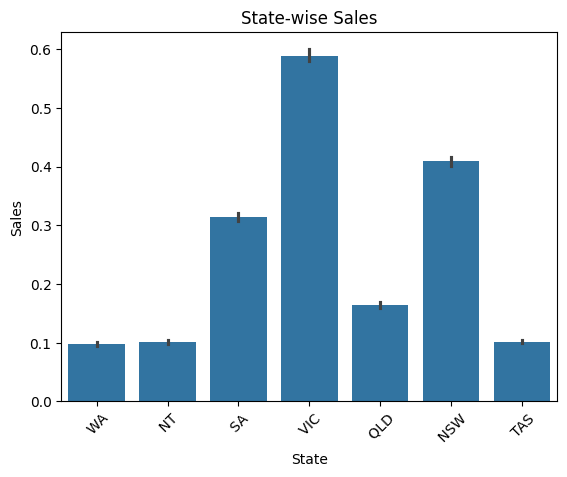

In [8]:
# State wise sales analysis
sns.barplot(x='State',y='Sales',data=data)
plt.title("State-wise Sales")
plt.xticks(rotation=45)
plt.show()

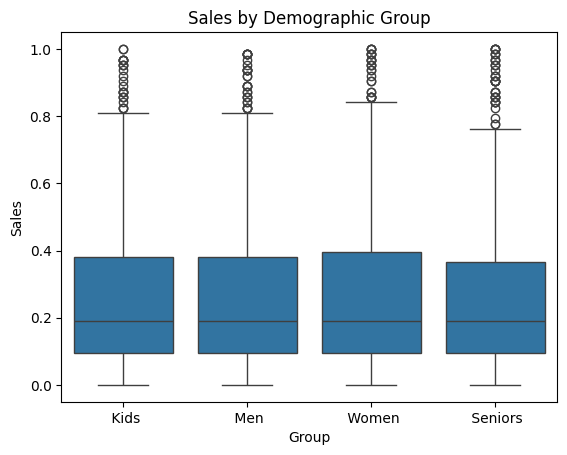

In [9]:
# Demographic group analysis
sns.boxplot(x='Group', y='Sales', data=data)
plt.title('Sales by Demographic Group')
plt.show()
# print(data.columns)

In [10]:
# For group hour by sales

# Correct mapping of Time to Hour
def map_time_to_hour(time):
    if time == 'Morning':
        return 9  # Assuming morning sales occur at 9 AM
    elif time == 'Afternoon':
        return 15  # Assuming afternoon sales occur at 3 PM
    elif time == 'Evening':
        return 18  # Assuming evening sales occur at 6 PM
    elif time == 'Night':
        return 21  # Assuming night sales occur at 9 PM
    else:
        return 0  # Default or unknown

# Apply the mapping function
data['Hour'] = data['Time'].apply(map_time_to_hour)

# Recheck unique hours and grouped data
print("Unique hours after remapping:", data['Hour'].unique())

# Regenerate the hourly sales data
hourly_sales = data.groupby('Hour')['Sales'].sum()
print(hourly_sales)

Unique hours after remapping: [0]
Hour
0    1920.650794
Name: Sales, dtype: float64


In [11]:
# Check unique values in 'Hour'
print("Unique hours:", data['Hour'].unique())

# Group sales by hour and inspect the grouped data
hourly_sales = data.groupby('Hour')['Sales'].sum()
print(hourly_sales)

Unique hours: [0]
Hour
0    1920.650794
Name: Sales, dtype: float64


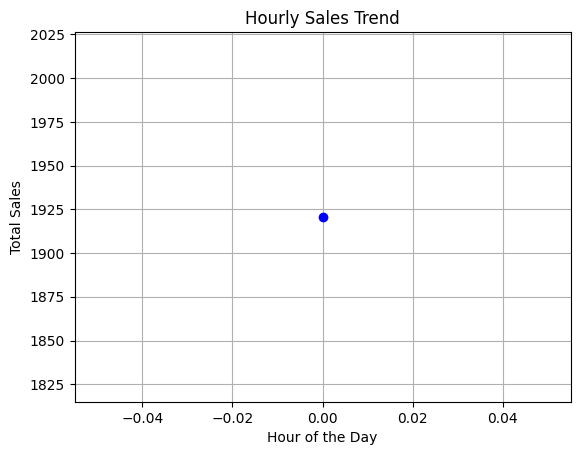

In [12]:
# Group sales by hour
hourly_sales = data.groupby('Hour')['Sales'].sum()

# Plot hourly sales
hourly_sales.plot(kind='line', title='Hourly Sales Trend', marker='o', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

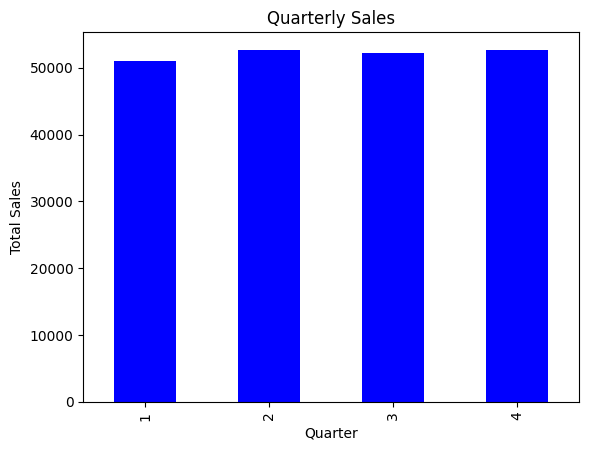

In [ ]:
# Quater trend
# Create dummy data
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
sales = np.random.randint(100, 1000, size=len(dates))
data = pd.DataFrame({'Date': dates, 'Sales': sales})

# Extract quarter
data['Quarter'] = data['Date'].dt.quarter

# Group by quarter and sum sales
quarterly_sales = data.groupby('Quarter')['Sales'].sum()

# Plot
quarterly_sales.plot(kind='bar', title='Quarterly Sales', color='blue')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.show()